## HUMAN ACTIVITY RECOGNITION USING SMARTPHONES

#### Context 

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data is recorded directly on the subject such as by smart phones that have accelerometers and gyroscopes.

#### Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#### The activities are as follows:

Walking, 
Walking_upstairs, 
Walking_downstairs, 
Standing, 
Sitting, 
Laying

**Accelerometer**:
            An accelerometer is an electromechanical device used to measure acceleration forces. Such forces may be static, like the continuous force of gravity or, as is the case with many mobile devices, dynamic to sense movement or vibrations.bold text


**Gyroscope**:
         is a device used for measuring or maintaining orientation and angular velocity.

### Content
1. Data Science Life Cycle
2. Import and Understand the Data
3. Exploratory Data Analysis 
4. Data Prepration
5. Reducing the features - PCA 
6. Statistical algorithms 
7. Tree based algorithms
8. Deep learning algorithms
9. Hyper Parameter tuning 
10. More Evaluation Parameters 
11. Flask API 

### Data Science Life Cycle

<img src="unnamed.png">

### Import and Understand the Data

In [1]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the train dataset

train_data=pd.read_csv(r"C:\Users\TRISHA\Documents\Data_science\human_activity_recognition\train.csv")

In [3]:
# Lets look at glimpse of the data

train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Shape

train_data.shape

(999, 563)

In [5]:
#Check the null values 
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
train_data.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

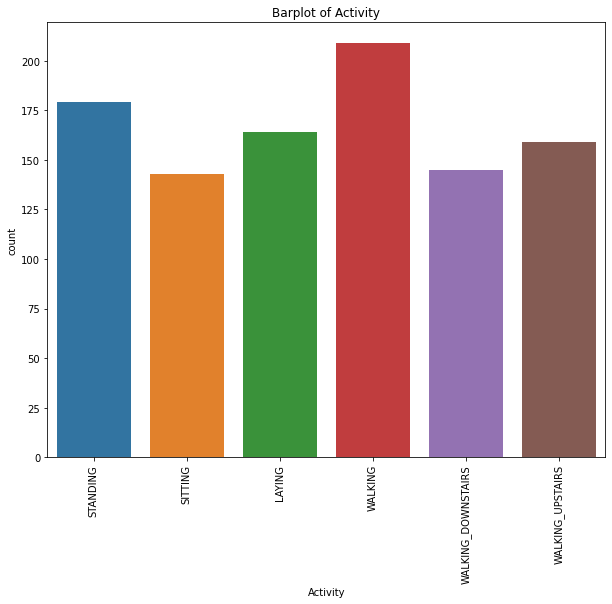

In [7]:
#checking if there is any imbalance data 
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train_data.Activity)
plt.xticks(rotation=90)

In [8]:
#importing the test data set
test_data=pd.read_csv(r"C:\Users\TRISHA\Documents\Data_science\human_activity_recognition\test.csv")

In [9]:
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [10]:
test_data.shape

(999, 563)

In [11]:
#Checking the null values
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
test_data.Activity.value_counts()

WALKING               185
LAYING                183
STANDING              178
SITTING               170
WALKING_UPSTAIRS      149
WALKING_DOWNSTAIRS    134
Name: Activity, dtype: int64

([<matplotlib.patches.Wedge at 0x1a4e92ac940>,
 [Text(0.9190366040825596, 0.604459858349913, 'LAYING'),
  Text(-0.1841958885037178, 1.0844684756406366, 'SITTING'),
  Text(-1.060935513313295, 0.29054403554479596, 'STANDING'),
  Text(-0.7447418486792265, -0.8095428208722798, 'WALKING'),
  Text(0.28219408917918665, -1.0631869525310822, 'WALKING_DOWNSTAIRS'),
  Text(1.0037711997212746, -0.44993708294617496, 'WALKING_UPSTAIRS')],
 [Text(0.5012926931359415, 0.3297053772817707, '18.52'),
  Text(-0.1004704846383915, 0.5915282594403471, '18.32'),
  Text(-0.5786920981708881, 0.15847856484261597, '17.82'),
  Text(-0.40622282655230535, -0.44156881138487986, '17.02'),
  Text(0.1539240486431927, -0.5799201559260447, '14.91'),
  Text(0.5475115634843316, -0.24542022706154992, '13.41')])

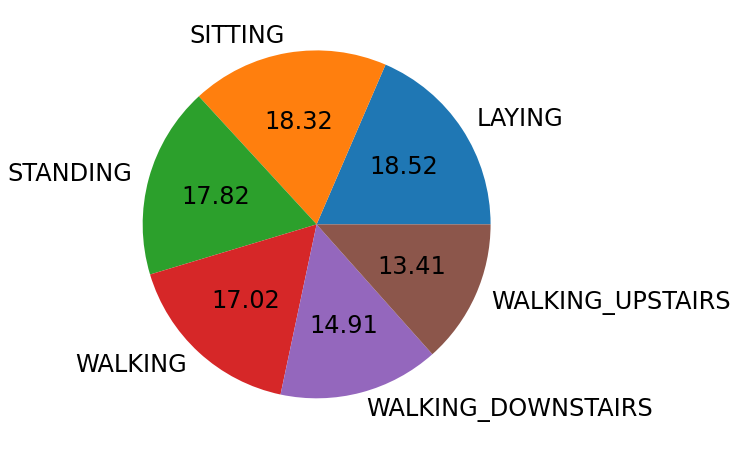

In [13]:
count_of_each_activity = np.array(test_data.Activity.value_counts())
activities = sorted(test_data.Activity.unique())


# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [8, 8], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

##  Exploratory Data Analysis

### Uni variate analysis

In [14]:
train_data.describe()
#we can observe 
# 1) that  the maximum value and the minimum values are 1.000000 and -1.000000 respectively
# 2) In most of the variables the mean and the mode are approximately equal which implies the data is normally distributed

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.272522,-0.017315,-0.106699,-0.564767,-0.421911,-0.601705,-0.596136,-0.439798,-0.591796,-0.411679,...,-0.219581,-0.541213,0.015125,0.002728,0.004282,-0.013146,-0.545935,0.058899,-0.033470,2.936937
std,0.070183,0.041918,0.056029,0.428018,0.501715,0.340713,0.400180,0.486153,0.351317,0.530312,...,0.351241,0.360838,0.349059,0.469766,0.629273,0.481251,0.471809,0.349956,0.168279,1.636577
min,-0.361205,-0.684097,-1.000000,-0.999300,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.944282,-0.999595,-0.939598,-0.976454,-0.995222,-0.994877,-1.000000,-0.875487,-0.980143,1.000000
25%,0.258468,-0.025925,-0.122726,-0.990822,-0.968894,-0.973927,-0.992207,-0.970928,-0.972885,-0.933391,...,-0.476273,-0.815733,-0.144342,-0.316220,-0.512150,-0.392773,-0.795959,0.030145,-0.103119,1.000000
50%,0.277054,-0.017185,-0.108829,-0.464909,-0.208523,-0.486962,-0.509215,-0.242165,-0.465163,-0.297181,...,-0.264434,-0.629299,0.010903,0.017954,0.012891,-0.016025,-0.717300,0.223164,0.030593,3.000000
75%,0.290635,-0.007523,-0.093717,-0.234604,0.045610,-0.314822,-0.289766,0.012828,-0.302503,-0.008596,...,-0.015262,-0.361251,0.178357,0.332586,0.538985,0.350713,-0.606748,0.281283,0.082679,5.000000
max,0.498177,0.324130,0.346658,0.543347,0.532506,0.364114,0.495926,0.502260,0.554965,0.680338,...,0.989538,0.956845,0.955207,0.998425,0.994519,0.971511,0.799174,0.385117,0.265795,6.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


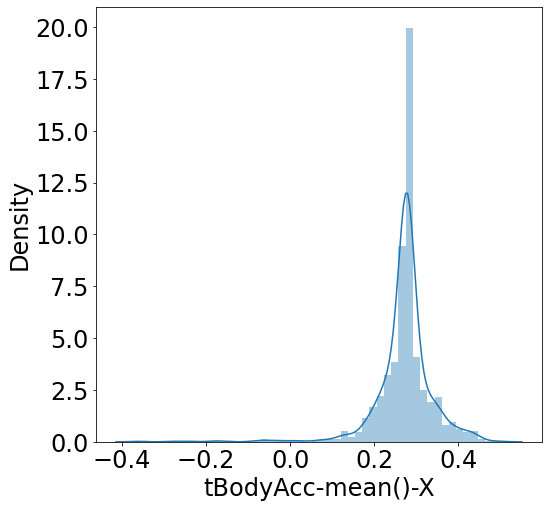

In [15]:
#Distrtibution plot of one of the mean vaiables tBodyAcc

sns.distplot(train_data['tBodyAcc-mean()-X']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc-std()-X', ylabel='Density'>

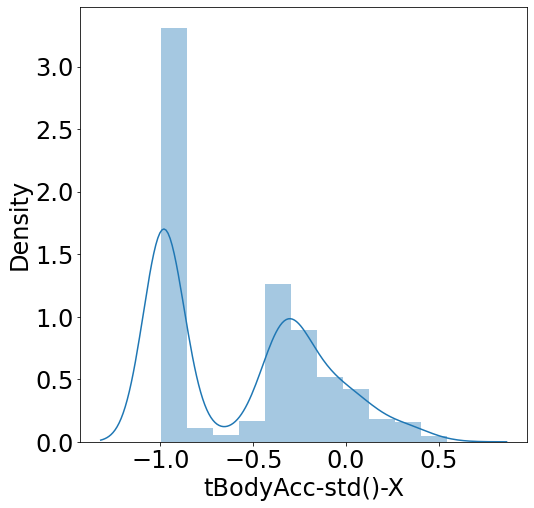

In [16]:
#distplot of one of the std variables

sns.distplot(train_data['tBodyAcc-std()-X'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc-mad()-X', ylabel='Density'>

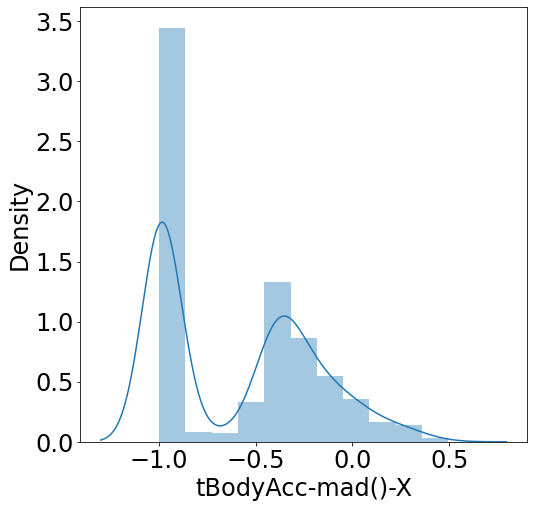

In [17]:
#distplot of one of the mode variables 

sns.distplot(train_data['tBodyAcc-mad()-X'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tBodyAcc-max()-Y', ylabel='Density'>

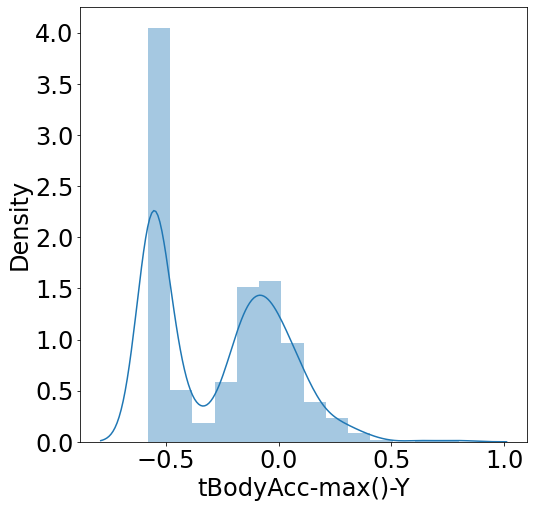

In [18]:
#distplot of one of the max variables
sns.distplot(train_data['tBodyAcc-max()-Y'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='angle(tBodyGyroJerkMean,gravityMean)', ylabel='Density'>

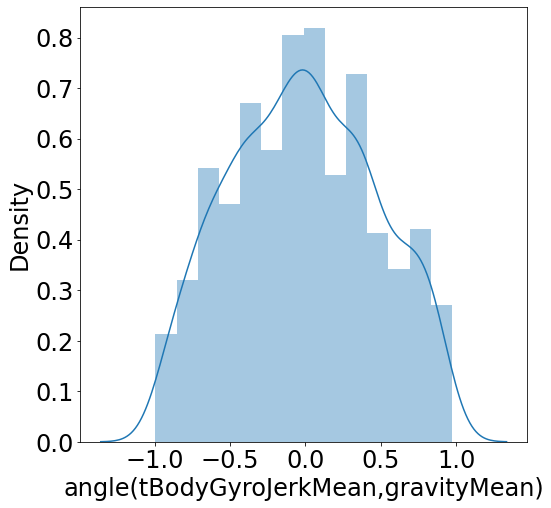

In [19]:
#distplot for one of the gyroscope varaible
sns.distplot(train_data['angle(tBodyGyroJerkMean,gravityMean)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='angle(X,gravityMean)', ylabel='Density'>

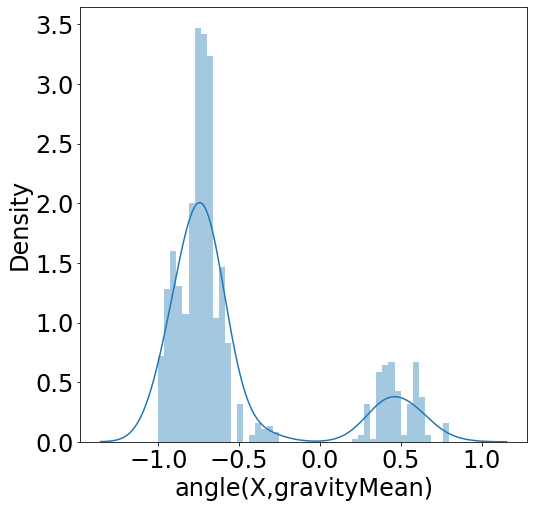

In [20]:
sns.distplot(train_data['angle(X,gravityMean)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fBodyAcc-entropy()-Z', ylabel='Density'>

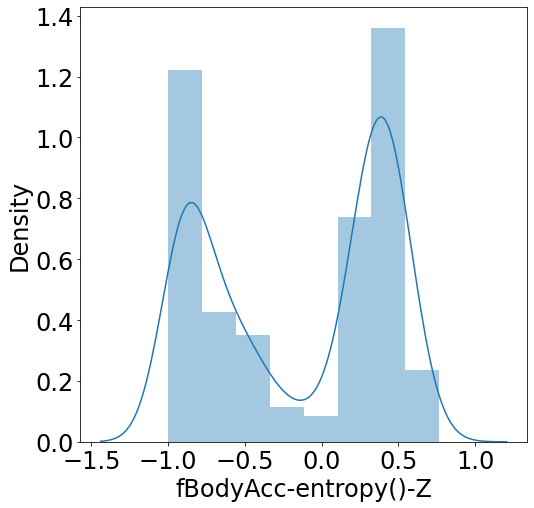

In [21]:
sns.distplot(train_data['fBodyAcc-entropy()-Z'])

### Bi variate analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.1, 9, 'Dynamic')

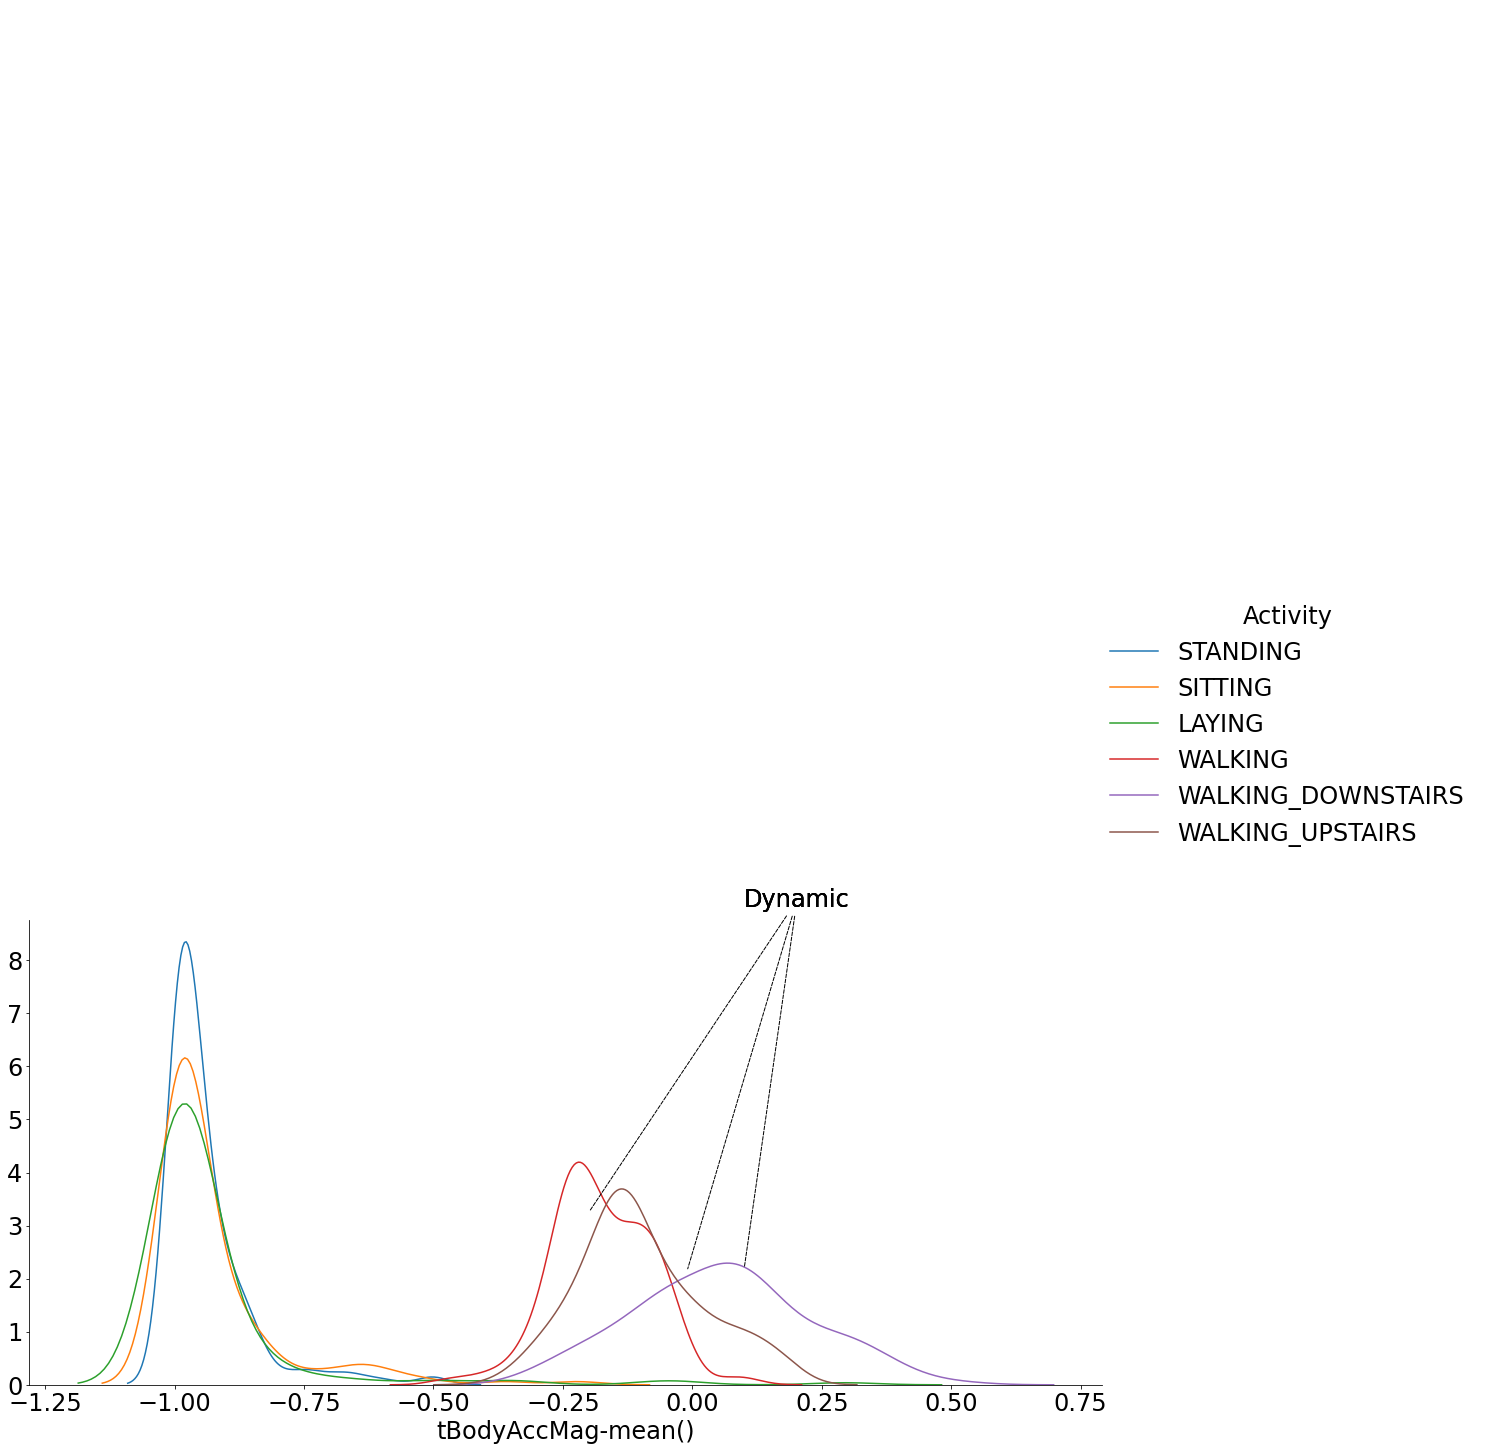

In [22]:
# Plot of acceleration vs different activities

facetgrid = sns.FacetGrid(train_data, hue='Activity', height=8,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


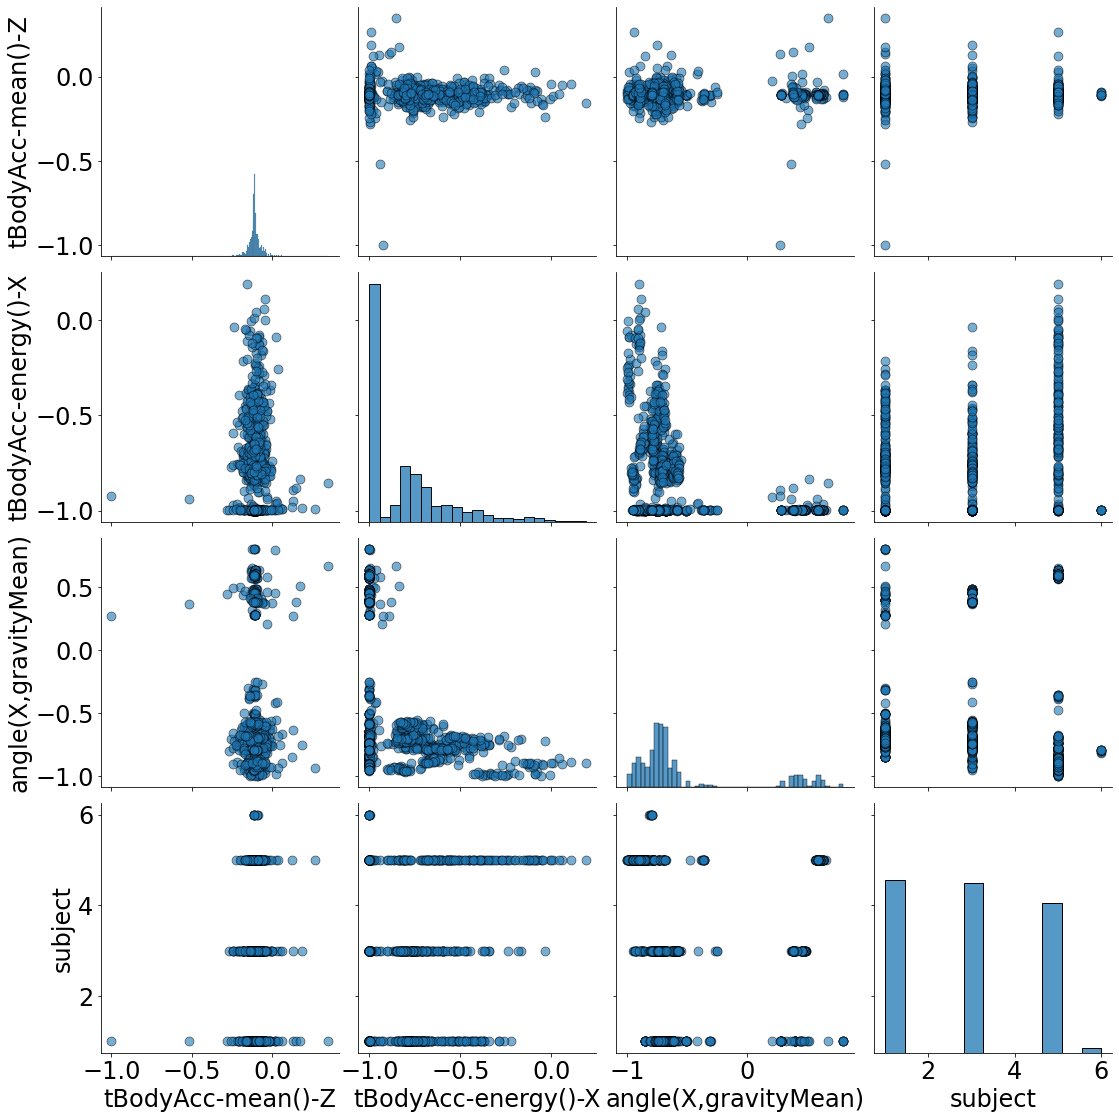

In [23]:
#pairplot of some of the variables along with activity and subject

plot = sns.pairplot(train_data[['tBodyAcc-mean()-Z','tBodyAcc-energy()-X','angle(X,gravityMean)','subject',]],plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

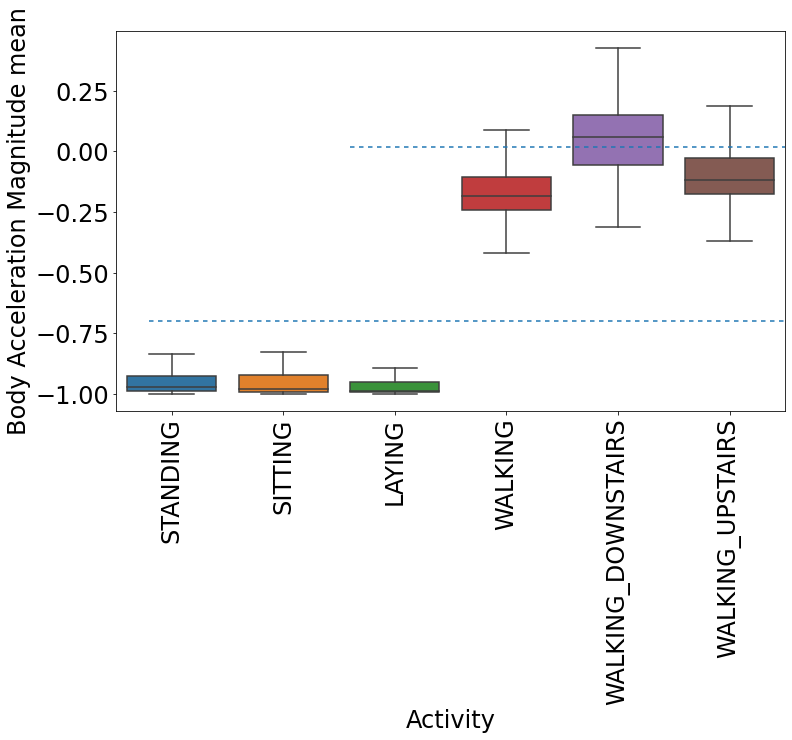

In [24]:
#The insights obtained through density plots can be represented using Box plots.
#Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories

plt.figure(figsize=(12,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

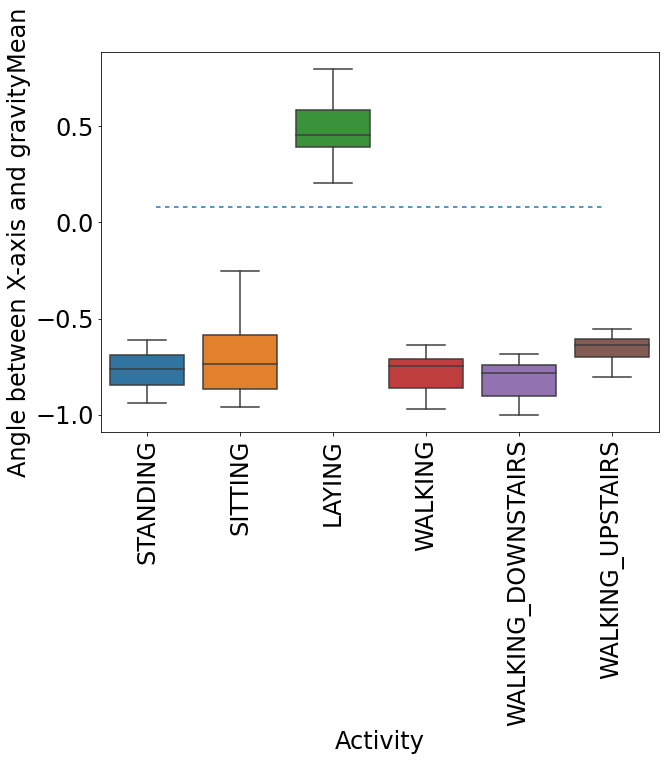

In [25]:
#From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.

plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.xticks(rotation = 90)

#### t-SNE Plot

Using **t-SNE** data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [30]:
from sklearn.manifold import TSNE

In [31]:
X_for_tsne = train_data.drop(['subject', 'Activity'], axis=1)

In [32]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 999 samples in 0.002s...
[t-SNE] Computed neighbors for 999 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 999 / 999
[t-SNE] Mean sigma: 1.872757
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.133591
[t-SNE] KL divergence after 1000 iterations: 0.505838


<AxesSubplot:>

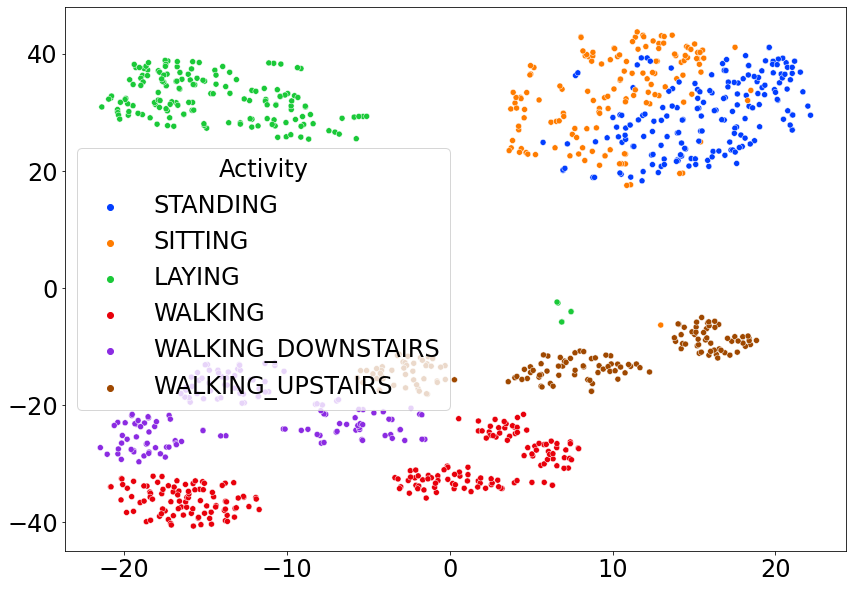

In [33]:
plt.figure(figsize=(14,10))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train_data["Activity"],palette="bright")

**POINT PLOT**:An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


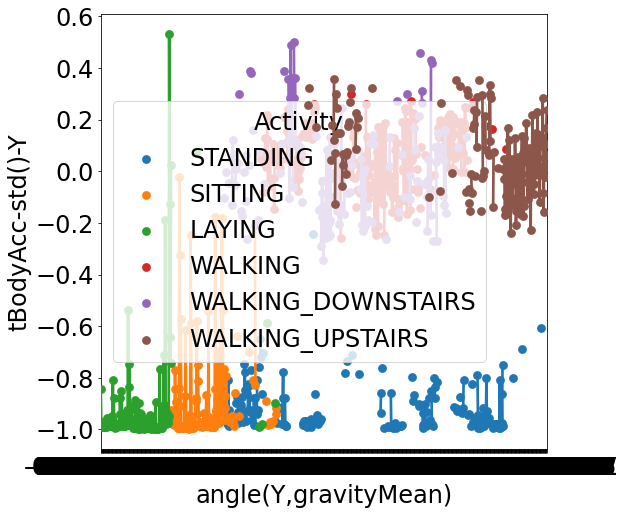

In [34]:
sns.pointplot(train_data['angle(Y,gravityMean)'], train_data['tBodyAcc-std()-Y'], hue=train_data['Activity']);

### Data Prepration 

In [35]:
#Converting the Activity variable records from categorical to numerical using a temp variable in both test and train data
#Train data
temp_train = []
for i in train_data.Activity:
    if i == "WALKING": temp_train.append(0)
    if i == "WALKING_UPSTAIRS": temp_train.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_train.append(2)
    if i == "SITTING": temp_train.append(3)
    if i == "STANDING": temp_train.append(4)
    if i == "LAYING": temp_train.append(5)
train_data["n_Activity"] = temp_train

#TEST data
temp_test = []
for i in test_data.Activity:
    if i == "WALKING": temp_test.append(0)
    if i == "WALKING_UPSTAIRS": temp_test.append(1)
    if i == "WALKING_DOWNSTAIRS": temp_test.append(2)
    if i == "SITTING": temp_test.append(3)
    if i == "STANDING": temp_test.append(4)
    if i == "LAYING": temp_test.append(5)
test_data["n_Activity"] = temp_test

In [36]:
#Dropping the Activity variable from both test and train datasets
test_data.drop(["Activity"] , axis = 1 , inplace = True)
train_data.drop(["Activity"] , axis = 1 , inplace = True)

In [37]:
train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [38]:
test_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject',
       'n_Activity'],
      dtype='object', length=563)

In [39]:
#converting the datsets into X and y independent and dependent variables respectively
X_train = train_data.iloc[:,0:562]

X_test = test_data.iloc[:,0:562]

print(X_train.shape)
#print(X_test.shape)

(999, 562)


In [40]:
y_train=train_data['n_Activity']
y_test=test_data['n_Activity']

print(y_train.shape)
print(y_test.shape)

(999,)
(999,)


In [41]:
#Using StandaradScalar to transform the data such that it has mean as 0 and deviation as 1
# NOte: we can sue MinMaxScalar as well
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)


scaled_train_data=scaler.transform(X_train)
scaled_test_data=scaler.transform(X_test)
scaled_train_data



array([[ 0.22897582, -0.07109638, -0.46795393, ...,  0.34605098,
        -0.14956908, -1.18412227],
       [ 0.08405787,  0.02159756, -0.30036879, ...,  0.34704669,
        -0.12394279, -1.18412227],
       [ 0.10165257, -0.05135717, -0.12075621, ...,  0.3480428 ,
        -0.09303278, -1.18412227],
       ...,
       [ 0.07973486, -0.06037878, -0.06692582, ...,  0.43090796,
        -0.21745851,  1.87256546],
       [ 0.03168433,  0.07953187,  0.18311468, ...,  0.43366483,
        -0.21346518,  1.87256546],
       [ 0.05657762,  0.00899166, -0.07558744, ...,  0.43125486,
        -0.22720232,  1.87256546]])

### Reducing the features - PCA

Reduction is features is required because the number of too many features present in the data. PCA is one of the method to reduce the features. 

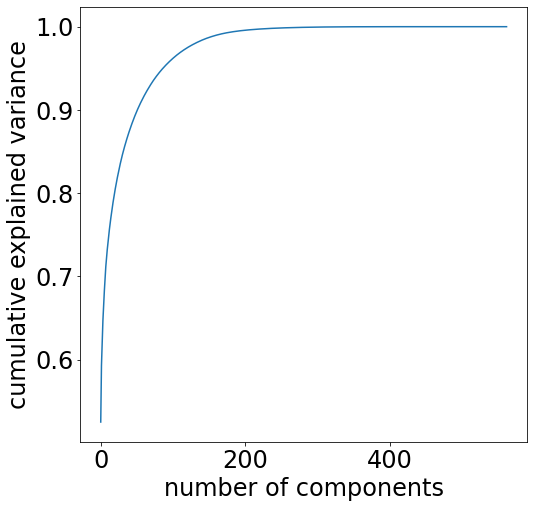

In [42]:
# Choosing the number of components

from sklearn.decomposition import PCA

pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [43]:
# Increase in variance flattens after 200 components. number of components = 200

In [44]:
#Doing Principle composite analysis(PCA) to reduce to the dimensionality which inturn helps in avoiding overfitting

from sklearn.decomposition import PCA
p_c_a= PCA(n_components=200)
p_c_a.fit(scaled_train_data)


x_pca=p_c_a.transform(scaled_train_data)
x_test_pca=p_c_a.transform(scaled_test_data)

In [45]:
print(scaled_train_data.shape)
print(x_pca.shape)

(999, 562)
(999, 200)


## Statistical algorithms on PCA results

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


#### Logistic regression

In [47]:
#Logistic regression
clf_Logistic = LogisticRegression().fit(x_pca, y_train)
prediction_lr = clf_Logistic.predict(x_test_pca)
accuracy_score(y_test, prediction_lr)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score(y_test, prediction_lr)*100))

Logistic Regression accuracy: 89.38938938938938%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Support Vector Classifier

In [48]:
# Support Vector Classifier

clf = SVC().fit(x_pca, y_train)
prediction = clf.predict(x_test_pca)
accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Support Vector Classifier accuracy: 87.78778778778779%


### Tree based, Ensemble and other ML Algorithms

#### Decision tree

In [49]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)
print('Decision tree Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

Decision tree Classifier accuracy: 87.78778778778779%


#### Random Forest

In [50]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))


Random Forest Classifier accuracy: 90.69069069069069%


#### XGBoost

In [51]:
#XGBoost

model = XGBClassifier(n_jobs=2) # using two processors 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prop = model.predict_proba(X_test)
#predictions = [round(value) for value in y_pred_prop]
predictions=y_pred.copy()
print('Random Forest Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest Classifier accuracy: 90.69069069069069%


#### K Nearest Neighbors

In [52]:
# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_score(y_test, prediction)*100))

K Nearest Neighbors Classifier accuracy: 76.37637637637637%


### Deep learning Algorithms

#### ANN

In [74]:
import tensorflow.contrib.keras as keras

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim =50 , init = 'he_uniform',activation='relu',input_dim = 562))

In [27]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 55, init = 'he_uniform',activation='relu'))

C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=55, kernel_initializer="he_uniform")`
  


In [28]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [29]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)


Train on 4925 samples, validate on 2427 samples
Epoch 1/10
4925/4925 [==============================] - 2s 444us/step - loss: -19550.7801 - accuracy: 0.1444 - val_loss: -74993.2636 - val_accuracy: 0.1492
Epoch 2/10
4925/4925 [==============================] - 2s 398us/step - loss: -242168.7264 - accuracy: 0.1444 - val_loss: -529179.9476 - val_accuracy: 0.1492
Epoch 3/10
4925/4925 [==============================] - 2s 400us/step - loss: -1046210.0255 - accuracy: 0.1444 - val_loss: -1818253.3492 - val_accuracy: 0.1492
Epoch 4/10
4925/4925 [==============================] - 2s 399us/step - loss: -2776661.4867 - accuracy: 0.1444 - val_loss: -4181293.3039 - val_accuracy: 0.1492
Epoch 5/10
4925/4925 [==============================] - 2s 391us/step - loss: -5759312.6024 - accuracy: 0.1444 - val_loss: -8065681.1882 - val_accuracy: 0.1492
Epoch 6/10
4925/4925 [==============================] - 2s 366us/step - loss: -10402934.5383 - accuracy: 0.1444 - val_loss: -14116224.6822 - val_accuracy: 0.

#### LSTM

### Hyper Parameter tuning - ANN

In [0]:
#Hyper parameter tuning for knowing what exact number of input neurons and output neurons gives max accuracy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units =6 , kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grids = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grids,cv=5)

In [225]:
grid_result=grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

[0.916627311706543,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (20,)}]

We can clearly see that after hyper parameter tuning the model is accurate at 
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (20,)}]

### Hyper Parameter tuning - SVM

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X_train, y_train)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adarsha.shiva

C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid

Best parameter set found:
{'C': 1, 'kernel': 'linear'}
Detailed grid scores:
0.919 (+/-0.043) for {'C': 100, 'kernel': 'linear'}

0.806 (+/-0.239) for {'C': 100, 'kernel': 'rbf'}

0.783 (+/-0.343) for {'C': 100, 'kernel': 'poly'}

0.270 (+/-0.261) for {'C': 100, 'kernel': 'sigmoid'}

0.919 (+/-0.043) for {'C': 50, 'kernel': 'linear'}

0.815 (+/-0.239) for {'C': 50, 'kernel': 'rbf'}

0.783 (+/-0.341) for {'C': 50, 'kernel': 'poly'}

0.267 (+/-0.265) for {'C': 50, 'kernel': 'sigmoid'}

0.919 (+/-0.041) for {'C': 20, 'kernel': 'linear'}

0.812 (+/-0.237) for {'C': 20, 'kernel': 'rbf'}

0.788 (+/-0.334) for {'C': 20, 'kernel': 'poly'}

0.269 (+/-0.262) for {'C': 20, 'kernel': 'sigmoid'}

0.921 (+/-0.039) for {'C': 1, 'kernel': 'linear'}

0.788 (+/-0.161) for {'C': 1, 'kernel': 'rbf'}

0.780 (+/-0.304) for {'C': 1, 'kernel': 'poly'}

0.272 (+/-0.265) for {'C': 1, 'kernel': 'sigmoid'}

0.919 (+/-0.032) for {'C': 0.1, 'kernel': 'linear'}

0.747 (+/-0.121) for {'C': 0.1, 'kernel': 'rbf'}

0.68

In [ ]:
# Best parameter set found:
# {'C': 1, 'kernel': 'linear'}

### Algorithm Comparison 

In [34]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), 
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    #XGBClassifier()
]

In [36]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\adarsha.shivananda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The defa

,Score
Model,
DecisionTreeClassifier,0.864269
KNeighborsClassifier,0.806583
SVC,0.930777
LogisticRegression,0.961656
RandomForestClassifier,0.901934


### More Evaluation Parameters

Text(0.5, 1, 'Confussion Matrix')

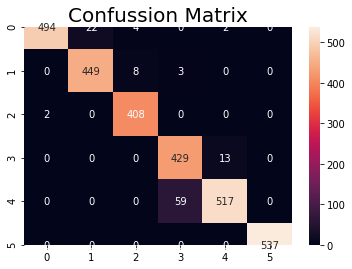

In [41]:
# confussion matrix
cm = confusion_matrix(prediction_lr, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  

In [42]:
# Clasification Report
cr = classification_report(y_test, prediction_lr)
 
print("Classification report >>> \n", cr)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       496
           1       0.98      0.95      0.96       471
           2       1.00      0.97      0.98       420
           3       0.97      0.87      0.92       491
           4       0.90      0.97      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
## data for the API

In [17]:
data = X_test[:1]

In [42]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2


In [ ]:
# copy paste the below input in postman

#{"tBodyAcc-mean()-X":0.25717778,"tBodyAcc-mean()-Y":-0.02328523,"tBodyAcc-mean()-Z":-0.014653762,"tBodyAcc-std()-X":-0.938404,"tBodyAcc-std()-Y":-0.92009078,"tBodyAcc-std()-Z":-0.66768331,"tBodyAcc-mad()-X":-0.95250112,"tBodyAcc-mad()-Y":-0.92524867,"tBodyAcc-mad()-Z":-0.67430222,"tBodyAcc-max()-X":-0.89408755,"tBodyAcc-max()-Y":-0.55457721,"tBodyAcc-max()-Z":-0.46622295,"tBodyAcc-min()-X":0.71720847,"tBodyAcc-min()-Y":0.6355024,"tBodyAcc-min()-Z":0.78949666,"tBodyAcc-sma()":-0.87776423,"tBodyAcc-energy()-X":-0.99776606,"tBodyAcc-energy()-Y":-0.99841381,"tBodyAcc-energy()-Z":-0.93434525,"tBodyAcc-iqr()-X":-0.97566897,"tBodyAcc-iqr()-Y":-0.94982365,"tBodyAcc-iqr()-Z":-0.8304778,"tBodyAcc-entropy()-X":-0.16808416,"tBodyAcc-entropy()-Y":-0.37899553,"tBodyAcc-entropy()-Z":0.24621698,"tBodyAcc-arCoeff()-X,1":0.52120364,"tBodyAcc-arCoeff()-X,2":-0.48779311,"tBodyAcc-arCoeff()-X,3":0.48228047,"tBodyAcc-arCoeff()-X,4":-0.045462113,"tBodyAcc-arCoeff()-Y,1":0.21195505,"tBodyAcc-arCoeff()-Y,2":-0.13489443,"tBodyAcc-arCoeff()-Y,3":0.13085848,"tBodyAcc-arCoeff()-Y,4":-0.014176313,"tBodyAcc-arCoeff()-Z,1":-0.10597085,"tBodyAcc-arCoeff()-Z,2":0.073544013,"tBodyAcc-arCoeff()-Z,3":-0.17151642,"tBodyAcc-arCoeff()-Z,4":0.040062978,"tBodyAcc-correlation()-X,Y":0.076988933,"tBodyAcc-correlation()-X,Z":-0.49054573,"tBodyAcc-correlation()-Y,Z":-0.70900265,"tGravityAcc-mean()-X":0.93648925,"tGravityAcc-mean()-Y":-0.28271916,"tGravityAcc-mean()-Z":0.11528825,"tGravityAcc-std()-X":-0.92542727,"tGravityAcc-std()-Y":-0.93701413,"tGravityAcc-std()-Z":-0.56428842,"tGravityAcc-mad()-X":-0.93001992,"tGravityAcc-mad()-Y":-0.93782195,"tGravityAcc-mad()-Z":-0.6055877,"tGravityAcc-max()-X":0.90608259,"tGravityAcc-max()-Y":-0.27924413,"tGravityAcc-max()-Z":0.15289519,"tGravityAcc-min()-X":0.9444614,"tGravityAcc-min()-Y":-0.26215956,"tGravityAcc-min()-Z":-0.076161676,"tGravityAcc-sma()":-0.01782692,"tGravityAcc-energy()-X":0.82929682,"tGravityAcc-energy()-Y":-0.8646206,"tGravityAcc-energy()-Z":-0.96779531,"tGravityAcc-iqr()-X":-0.94972666,"tGravityAcc-iqr()-Y":-0.9461192,"tGravityAcc-iqr()-Z":-0.75971815,"tGravityAcc-entropy()-X":-0.42497535,"tGravityAcc-entropy()-Y":-1.0,"tGravityAcc-entropy()-Z":0.21922731,"tGravityAcc-arCoeff()-X,1":-0.43025357,"tGravityAcc-arCoeff()-X,2":0.43104828,"tGravityAcc-arCoeff()-X,3":-0.43183892,"tGravityAcc-arCoeff()-X,4":0.4327738,"tGravityAcc-arCoeff()-Y,1":-0.79546772,"tGravityAcc-arCoeff()-Y,2":0.78131389,"tGravityAcc-arCoeff()-Y,3":-0.78039147,"tGravityAcc-arCoeff()-Y,4":0.78527158,"tGravityAcc-arCoeff()-Z,1":-0.98441024,"tGravityAcc-arCoeff()-Z,2":0.98717986,"tGravityAcc-arCoeff()-Z,3":-0.98941477,"tGravityAcc-arCoeff()-Z,4":0.98768613,"tGravityAcc-correlation()-X,Y":0.98058028,"tGravityAcc-correlation()-X,Z":-0.99635177,"tGravityAcc-correlation()-Y,Z":-0.96011706,"tBodyAccJerk-mean()-X":0.072046007,"tBodyAccJerk-mean()-Y":0.045754401,"tBodyAccJerk-mean()-Z":-0.10604266,"tBodyAccJerk-std()-X":-0.90668276,"tBodyAccJerk-std()-Y":-0.93801639,"tBodyAccJerk-std()-Z":-0.93593583,"tBodyAccJerk-mad()-X":-0.91608093,"tBodyAccJerk-mad()-Y":-0.93672546,"tBodyAccJerk-mad()-Z":-0.94905379,"tBodyAccJerk-max()-X":-0.90322415,"tBodyAccJerk-max()-Y":-0.94981833,"tBodyAccJerk-max()-Z":-0.89140347,"tBodyAccJerk-min()-X":0.89847935,"tBodyAccJerk-min()-Y":0.95018164,"tBodyAccJerk-min()-Z":0.94615279,"tBodyAccJerk-sma()":-0.93067288,"tBodyAccJerk-energy()-X":-0.99504593,"tBodyAccJerk-energy()-Y":-0.99749551,"tBodyAccJerk-energy()-Z":-0.9970156,"tBodyAccJerk-iqr()-X":-0.936416,"tBodyAccJerk-iqr()-Y":-0.94687413,"tBodyAccJerk-iqr()-Z":-0.96877461,"tBodyAccJerk-entropy()-X":-0.085174151,"tBodyAccJerk-entropy()-Y":-0.31026304,"tBodyAccJerk-entropy()-Z":-0.51028758,"tBodyAccJerk-arCoeff()-X,1":0.52148173,"tBodyAccJerk-arCoeff()-X,2":-0.22588966,"tBodyAccJerk-arCoeff()-X,3":0.49172843,"tBodyAccJerk-arCoeff()-X,4":0.31275555,"tBodyAccJerk-arCoeff()-Y,1":0.2297968,"tBodyAccJerk-arCoeff()-Y,2":0.11395925,"tBodyAccJerk-arCoeff()-Y,3":0.21987861,"tBodyAccJerk-arCoeff()-Y,4":0.42297454,"tBodyAccJerk-arCoeff()-Z,1":-0.082633177,"tBodyAccJerk-arCoeff()-Z,2":0.14042653,"tBodyAccJerk-arCoeff()-Z,3":-0.19623228,"tBodyAccJerk-arCoeff()-Z,4":0.072357939,"tBodyAccJerk-correlation()-X,Y":-0.26486023,"tBodyAccJerk-correlation()-X,Z":0.03585215,"tBodyAccJerk-correlation()-Y,Z":-0.34973525,"tBodyGyro-mean()-X":0.11997616,"tBodyGyro-mean()-Y":-0.091792335,"tBodyGyro-mean()-Z":0.18962854,"tBodyGyro-std()-X":-0.88308911,"tBodyGyro-std()-Y":-0.8161636,"tBodyGyro-std()-Z":-0.94088123,"tBodyGyro-mad()-X":-0.88861231,"tBodyGyro-mad()-Y":-0.85780102,"tBodyGyro-mad()-Z":-0.94581827,"tBodyGyro-max()-X":-0.66341057,"tBodyGyro-max()-Y":-0.71343663,"tBodyGyro-max()-Z":-0.64867861,"tBodyGyro-min()-X":0.83710039,"tBodyGyro-min()-Y":0.82525677,"tBodyGyro-min()-Z":0.81097714,"tBodyGyro-sma()":-0.79649994,"tBodyGyro-energy()-X":-0.97961636,"tBodyGyro-energy()-Y":-0.98290006,"tBodyGyro-energy()-Z":-0.99403684,"tBodyGyro-iqr()-X":-0.88655788,"tBodyGyro-iqr()-Y":-0.90610426,"tBodyGyro-iqr()-Z":-0.95804876,"tBodyGyro-entropy()-X":0.77403279,"tBodyGyro-entropy()-Y":-0.26770588,"tBodyGyro-entropy()-Z":0.45224806,"tBodyGyro-arCoeff()-X,1":-0.078451267,"tBodyGyro-arCoeff()-X,2":-0.012578616,"tBodyGyro-arCoeff()-X,3":0.23598156,"tBodyGyro-arCoeff()-X,4":-0.19904751,"tBodyGyro-arCoeff()-Y,1":0.03391784,"tBodyGyro-arCoeff()-Y,2":-0.080780533,"tBodyGyro-arCoeff()-Y,3":0.0069987153,"tBodyGyro-arCoeff()-Y,4":0.24488551,"tBodyGyro-arCoeff()-Z,1":0.21651661,"tBodyGyro-arCoeff()-Z,2":-0.27968077,"tBodyGyro-arCoeff()-Z,3":0.24973875,"tBodyGyro-arCoeff()-Z,4":0.017719752,"tBodyGyro-correlation()-X,Y":0.64846454,"tBodyGyro-correlation()-X,Z":-0.23693109,"tBodyGyro-correlation()-Y,Z":-0.30173469,"tBodyGyroJerk-mean()-X":-0.20489621,"tBodyGyroJerk-mean()-Y":-0.17448771,"tBodyGyroJerk-mean()-Z":-0.09338934,"tBodyGyroJerk-std()-X":-0.90122415,"tBodyGyroJerk-std()-Y":-0.91086005,"tBodyGyroJerk-std()-Z":-0.93925042,"tBodyGyroJerk-mad()-X":-0.91036271,"tBodyGyroJerk-mad()-Y":-0.92735675,"tBodyGyroJerk-mad()-Z":-0.95355413,"tBodyGyroJerk-max()-X":-0.86791431,"tBodyGyroJerk-max()-Y":-0.91349778,"tBodyGyroJerk-max()-Z":-0.89757791,"tBodyGyroJerk-min()-X":0.90493669,"tBodyGyroJerk-min()-Y":0.91730839,"tBodyGyroJerk-min()-Z":0.9476122,"tBodyGyroJerk-sma()":-0.92960905,"tBodyGyroJerk-energy()-X":-0.99468622,"tBodyGyroJerk-energy()-Y":-0.99579057,"tBodyGyroJerk-energy()-Z":-0.99781265,"tBodyGyroJerk-iqr()-X":-0.93654081,"tBodyGyroJerk-iqr()-Y":-0.95887957,"tBodyGyroJerk-iqr()-Z":-0.97034831,"tBodyGyroJerk-entropy()-X":0.03661912,"tBodyGyroJerk-entropy()-Y":0.076459933,"tBodyGyroJerk-entropy()-Z":-0.19712605,"tBodyGyroJerk-arCoeff()-X,1":0.10651426,"tBodyGyroJerk-arCoeff()-X,2":-0.020811895,"tBodyGyroJerk-arCoeff()-X,3":0.19325784,"tBodyGyroJerk-arCoeff()-X,4":0.30447875,"tBodyGyroJerk-arCoeff()-Y,1":0.11572923,"tBodyGyroJerk-arCoeff()-Y,2":0.0541496,"tBodyGyroJerk-arCoeff()-Y,3":0.068951237,"tBodyGyroJerk-arCoeff()-Y,4":0.1970496,"tBodyGyroJerk-arCoeff()-Z,1":0.30992826,"tBodyGyroJerk-arCoeff()-Z,2":-0.21265711,"tBodyGyroJerk-arCoeff()-Z,3":0.17317814,"tBodyGyroJerk-arCoeff()-Z,4":0.14584454,"tBodyGyroJerk-correlation()-X,Y":0.12400875,"tBodyGyroJerk-correlation()-X,Z":-0.15534634,"tBodyGyroJerk-correlation()-Y,Z":-0.32343727,"tBodyAccMag-mean()":-0.86692938,"tBodyAccMag-std()":-0.70519112,"tBodyAccMag-mad()":-0.74402172,"tBodyAccMag-max()":-0.76079564,"tBodyAccMag-min()":-0.9816487,"tBodyAccMag-sma()":-0.86692938,"tBodyAccMag-energy()":-0.98016578,"tBodyAccMag-iqr()":-0.85947423,"tBodyAccMag-entropy()":0.25510436,"tBodyAccMag-arCoeff()1":0.053779695,"tBodyAccMag-arCoeff()2":-0.20414449,"tBodyAccMag-arCoeff()3":0.61052755,"tBodyAccMag-arCoeff()4":-0.56444932,"tGravityAccMag-mean()":-0.86692938,"tGravityAccMag-std()":-0.70519112,"tGravityAccMag-mad()":-0.74402172,"tGravityAccMag-max()":-0.76079564,"tGravityAccMag-min()":-0.9816487,"tGravityAccMag-sma()":-0.86692938,"tGravityAccMag-energy()":-0.98016578,"tGravityAccMag-iqr()":-0.85947423,"tGravityAccMag-entropy()":0.25510436,"tGravityAccMag-arCoeff()1":0.053779695,"tGravityAccMag-arCoeff()2":-0.20414449,"tGravityAccMag-arCoeff()3":0.61052755,"tGravityAccMag-arCoeff()4":-0.56444932,"tBodyAccJerkMag-mean()":-0.92976655,"tBodyAccJerkMag-std()":-0.89599425,"tBodyAccJerkMag-mad()":-0.90041731,"tBodyAccJerkMag-max()":-0.90300439,"tBodyAccJerkMag-min()":-0.97501109,"tBodyAccJerkMag-sma()":-0.92976655,"tBodyAccJerkMag-energy()":-0.99560772,"tBodyAccJerkMag-iqr()":-0.91412066,"tBodyAccJerkMag-entropy()":-0.12955231,"tBodyAccJerkMag-arCoeff()1":0.23891093,"tBodyAccJerkMag-arCoeff()2":-0.34559715,"tBodyAccJerkMag-arCoeff()3":0.32646236,"tBodyAccJerkMag-arCoeff()4":-0.263048,"tBodyGyroMag-mean()":-0.79554393,"tBodyGyroMag-std()":-0.76207322,"tBodyGyroMag-mad()":-0.78267232,"tBodyGyroMag-max()":-0.71659365,"tBodyGyroMag-min()":-0.76419261,"tBodyGyroMag-sma()":-0.79554393,"tBodyGyroMag-energy()":-0.97415212,"tBodyGyroMag-iqr()":-0.83958101,"tBodyGyroMag-entropy()":0.66756269,"tBodyGyroMag-arCoeff()1":0.035621137,"tBodyGyroMag-arCoeff()2":-0.16189398,"tBodyGyroMag-arCoeff()3":0.15325006,"tBodyGyroMag-arCoeff()4":-0.006759604,"tBodyGyroJerkMag-mean()":-0.92519489,"tBodyGyroJerkMag-std()":-0.89434361,"tBodyGyroJerkMag-mad()":-0.90014668,"tBodyGyroJerkMag-max()":-0.91673708,"tBodyGyroJerkMag-min()":-0.97636665,"tBodyGyroJerkMag-sma()":-0.92519489,"tBodyGyroJerkMag-energy()":-0.99582422,"tBodyGyroJerkMag-iqr()":-0.9118375,"tBodyGyroJerkMag-entropy()":0.33165431,"tBodyGyroJerkMag-arCoeff()1":0.51695316,"tBodyGyroJerkMag-arCoeff()2":-0.513504,"tBodyGyroJerkMag-arCoeff()3":0.041319806,"tBodyGyroJerkMag-arCoeff()4":0.011835012,"fBodyAcc-mean()-X":-0.91850969,"fBodyAcc-mean()-Y":-0.91821319,"fBodyAcc-mean()-Z":-0.78909145,"fBodyAcc-std()-X":-0.94829035,"fBodyAcc-std()-Y":-0.92513687,"fBodyAcc-std()-Z":-0.63631674,"fBodyAcc-mad()-X":-0.93068029,"fBodyAcc-mad()-Y":-0.92443848,"fBodyAcc-mad()-Z":-0.72490255,"fBodyAcc-max()-X":-0.96842407,"fBodyAcc-max()-Y":-0.94013675,"fBodyAcc-max()-Z":-0.59718873,"fBodyAcc-min()-X":-0.96613713,"fBodyAcc-min()-Y":-0.98445054,"fBodyAcc-min()-Z":-0.95208707,"fBodyAcc-sma()":-0.86506318,"fBodyAcc-energy()-X":-0.99784371,"fBodyAcc-energy()-Y":-0.99603625,"fBodyAcc-energy()-Z":-0.94019503,"fBodyAcc-iqr()-X":-0.90484043,"fBodyAcc-iqr()-Y":-0.93381245,"fBodyAcc-iqr()-Z":-0.86938291,"fBodyAcc-entropy()-X":-0.33967327,"fBodyAcc-entropy()-Y":-0.48580324,"fBodyAcc-entropy()-Z":-0.16625765,"fBodyAcc-maxInds-X":-1.0,"fBodyAcc-maxInds-Y":-1.0,"fBodyAcc-maxInds-Z":-1.0,"fBodyAcc-meanFreq()-X":0.011116947,"fBodyAcc-meanFreq()-Y":0.12125069,"fBodyAcc-meanFreq()-Z":-0.52294869,"fBodyAcc-skewness()-X":-0.5719995,"fBodyAcc-kurtosis()-X":-0.89461236,"fBodyAcc-skewness()-Y":-0.33826592,"fBodyAcc-kurtosis()-Y":-0.68679745,"fBodyAcc-skewness()-Z":0.1895525,"fBodyAcc-kurtosis()-Z":-0.11359571,"fBodyAcc-bandsEnergy()-1,8":-0.99850627,"fBodyAcc-bandsEnergy()-9,16":-0.99794262,"fBodyAcc-bandsEnergy()-17,24":-0.99559788,"fBodyAcc-bandsEnergy()-25,32":-0.99503559,"fBodyAcc-bandsEnergy()-33,40":-0.9959769,"fBodyAcc-bandsEnergy()-41,48":-0.99148743,"fBodyAcc-bandsEnergy()-49,56":-0.99213116,"fBodyAcc-bandsEnergy()-57,64":-0.99977512,"fBodyAcc-bandsEnergy()-1,16":-0.99820395,"fBodyAcc-bandsEnergy()-17,32":-0.99474673,"fBodyAcc-bandsEnergy()-33,48":-0.99430903,"fBodyAcc-bandsEnergy()-49,64":-0.99469323,"fBodyAcc-bandsEnergy()-1,24":-0.99802046,"fBodyAcc-bandsEnergy()-25,48":-0.99372747,"fBodyAcc-bandsEnergy()-1,8.1":-0.99620895,"fBodyAcc-bandsEnergy()-9,16.1":-0.99797615,"fBodyAcc-bandsEnergy()-17,24.1":-0.99892091,"fBodyAcc-bandsEnergy()-25,32.1":-0.99640106,"fBodyAcc-bandsEnergy()-33,40.1":-0.99755992,"fBodyAcc-bandsEnergy()-41,48.1":-0.99506803,"fBodyAcc-bandsEnergy()-49,56.1":-0.99735126,"fBodyAcc-bandsEnergy()-57,64.1":-0.99823805,"fBodyAcc-bandsEnergy()-1,16.1":-0.99607053,"fBodyAcc-bandsEnergy()-17,32.1":-0.99792459,"fBodyAcc-bandsEnergy()-33,48.1":-0.99635664,"fBodyAcc-bandsEnergy()-49,64.1":-0.9976398,"fBodyAcc-bandsEnergy()-1,24.1":-0.99622004,"fBodyAcc-bandsEnergy()-25,48.1":-0.99622539,"fBodyAcc-bandsEnergy()-1,8.2":-0.9247055,"fBodyAcc-bandsEnergy()-9,16.2":-0.99409728,"fBodyAcc-bandsEnergy()-17,24.2":-0.99532347,"fBodyAcc-bandsEnergy()-25,32.2":-0.99896944,"fBodyAcc-bandsEnergy()-33,40.2":-0.99790162,"fBodyAcc-bandsEnergy()-41,48.2":-0.99492962,"fBodyAcc-bandsEnergy()-49,56.2":-0.98926072,"fBodyAcc-bandsEnergy()-57,64.2":-0.9800854,"fBodyAcc-bandsEnergy()-1,16.2":-0.93793669,"fBodyAcc-bandsEnergy()-17,32.2":-0.99667757,"fBodyAcc-bandsEnergy()-33,48.2":-0.9970254,"fBodyAcc-bandsEnergy()-49,64.2":-0.98642738,"fBodyAcc-bandsEnergy()-1,24.2":-0.93920079,"fBodyAcc-bandsEnergy()-25,48.2":-0.99843184,"fBodyAccJerk-mean()-X":-0.89963316,"fBodyAccJerk-mean()-Y":-0.937485,"fBodyAccJerk-mean()-Z":-0.9235514,"fBodyAccJerk-std()-X":-0.92442913,"fBodyAccJerk-std()-Y":-0.94321038,"fBodyAccJerk-std()-Z":-0.94789152,"fBodyAccJerk-mad()-X":-0.89661455,"fBodyAccJerk-mad()-Y":-0.93830911,"fBodyAccJerk-mad()-Z":-0.9425757,"fBodyAccJerk-max()-X":-0.94863426,"fBodyAccJerk-max()-Y":-0.95832542,"fBodyAccJerk-max()-Z":-0.95881686,"fBodyAccJerk-min()-X":-0.94388241,"fBodyAccJerk-min()-Y":-0.98730333,"fBodyAccJerk-min()-Z":-0.97846559,"fBodyAccJerk-sma()":-0.90527425,"fBodyAccJerk-energy()-X":-0.99503609,"fBodyAccJerk-energy()-Y":-0.99749931,"fBodyAccJerk-energy()-Z":-0.9970307,"fBodyAccJerk-iqr()-X":-0.88707736,"fBodyAccJerk-iqr()-Y":-0.93581956,"fBodyAccJerk-iqr()-Z":-0.95365327,"fBodyAccJerk-entropy()-X":-0.4706616,"fBodyAccJerk-entropy()-Y":-0.6721718,"fBodyAccJerk-entropy()-Z":-0.59627404,"fBodyAccJerk-maxInds-X":-0.52,"fBodyAccJerk-maxInds-Y":0.08,"fBodyAccJerk-maxInds-Z":0.32,"fBodyAccJerk-meanFreq()-X":0.45100539,"fBodyAccJerk-meanFreq()-Y":0.13716703,"fBodyAccJerk-meanFreq()-Z":-0.18029913,"fBodyAccJerk-skewness()-X":-0.58008614,"fBodyAccJerk-kurtosis()-X":-0.90807003,"fBodyAccJerk-skewness()-Y":-0.62552686,"fBodyAccJerk-kurtosis()-Y":-0.94275716,"fBodyAccJerk-skewness()-Z":-0.66191006,"fBodyAccJerk-kurtosis()-Z":-0.91153211,"fBodyAccJerk-bandsEnergy()-1,8":-0.99901148,"fBodyAccJerk-bandsEnergy()-9,16":-0.99763006,"fBodyAccJerk-bandsEnergy()-17,24":-0.99598477,"fBodyAccJerk-bandsEnergy()-25,32":-0.99470846,"fBodyAccJerk-bandsEnergy()-33,40":-0.99557158,"fBodyAccJerk-bandsEnergy()-41,48":-0.98787651,"fBodyAccJerk-bandsEnergy()-49,56":-0.98644523,"fBodyAccJerk-bandsEnergy()-57,64":-0.99820517,"fBodyAccJerk-bandsEnergy()-1,16":-0.99804041,"fBodyAccJerk-bandsEnergy()-17,32":-0.99449682,"fBodyAccJerk-bandsEnergy()-33,48":-0.99204962,"fBodyAccJerk-bandsEnergy()-49,64":-0.98633303,"fBodyAccJerk-bandsEnergy()-1,24":-0.99689353,"fBodyAccJerk-bandsEnergy()-25,48":-0.99076269,"fBodyAccJerk-bandsEnergy()-1,8.1":-0.99940916,"fBodyAccJerk-bandsEnergy()-9,16.1":-0.99864806,"fBodyAccJerk-bandsEnergy()-17,24.1":-0.99874875,"fBodyAccJerk-bandsEnergy()-25,32.1":-0.99640627,"fBodyAccJerk-bandsEnergy()-33,40.1":-0.99717222,"fBodyAccJerk-bandsEnergy()-41,48.1":-0.9945302,"fBodyAccJerk-bandsEnergy()-49,56.1":-0.99791979,"fBodyAccJerk-bandsEnergy()-57,64.1":-0.9999697,"fBodyAccJerk-bandsEnergy()-1,16.1":-0.99864167,"fBodyAccJerk-bandsEnergy()-17,32.1":-0.9974017,"fBodyAccJerk-bandsEnergy()-33,48.1":-0.99541085,"fBodyAccJerk-bandsEnergy()-49,64.1":-0.9981824,"fBodyAccJerk-bandsEnergy()-1,24.1":-0.99846306,"fBodyAccJerk-bandsEnergy()-25,48.1":-0.99599581,"fBodyAccJerk-bandsEnergy()-1,8.2":-0.99363885,"fBodyAccJerk-bandsEnergy()-9,16.2":-0.9978378,"fBodyAccJerk-bandsEnergy()-17,24.2":-0.99712931,"fBodyAccJerk-bandsEnergy()-25,32.2":-0.9987495,"fBodyAccJerk-bandsEnergy()-33,40.2":-0.99670876,"fBodyAccJerk-bandsEnergy()-41,48.2":-0.99510966,"fBodyAccJerk-bandsEnergy()-49,56.2":-0.99848581,"fBodyAccJerk-bandsEnergy()-57,64.2":-0.99909354,"fBodyAccJerk-bandsEnergy()-1,16.2":-0.99592463,"fBodyAccJerk-bandsEnergy()-17,32.2":-0.99795094,"fBodyAccJerk-bandsEnergy()-33,48.2":-0.9960129,"fBodyAccJerk-bandsEnergy()-49,64.2":-0.99846008,"fBodyAccJerk-bandsEnergy()-1,24.2":-0.99626705,"fBodyAccJerk-bandsEnergy()-25,48.2":-0.99770046,"fBodyGyro-mean()-X":-0.82355788,"fBodyGyro-mean()-Y":-0.80791598,"fBodyGyro-mean()-Z":-0.91791256,"fBodyGyro-std()-X":-0.90326274,"fBodyGyro-std()-Y":-0.822677,"fBodyGyro-std()-Z":-0.95616508,"fBodyGyro-mad()-X":-0.86512704,"fBodyGyro-mad()-Y":-0.83180082,"fBodyGyro-mad()-Z":-0.94105617,"fBodyGyro-max()-X":-0.90479801,"fBodyGyro-max()-Y":-0.87925663,"fBodyGyro-max()-Z":-0.96778849,"fBodyGyro-min()-X":-0.87859934,"fBodyGyro-min()-Y":-0.94832915,"fBodyGyro-min()-Z":-0.91968517,"fBodyGyro-sma()":-0.82847203,"fBodyGyro-energy()-X":-0.99294953,"fBodyGyro-energy()-Y":-0.98266311,"fBodyGyro-energy()-Z":-0.99799327,"fBodyGyro-iqr()-X":-0.8788944,"fBodyGyro-iqr()-Y":-0.83815197,"fBodyGyro-iqr()-Z":-0.92913995,"fBodyGyro-entropy()-X":0.0007581481,"fBodyGyro-entropy()-Y":0.20014368,"fBodyGyro-entropy()-Z":-0.25338416,"fBodyGyro-maxInds-X":-1.0,"fBodyGyro-maxInds-Y":-0.93548387,"fBodyGyro-maxInds-Z":-0.93103448,"fBodyGyro-meanFreq()-X":0.18403457,"fBodyGyro-meanFreq()-Y":-0.059322857,"fBodyGyro-meanFreq()-Z":0.43810716,"fBodyGyro-skewness()-X":-0.39542276,"fBodyGyro-kurtosis()-X":-0.6987616,"fBodyGyro-skewness()-Y":-0.38745724,"fBodyGyro-kurtosis()-Y":-0.78639417,"fBodyGyro-skewness()-Z":-0.48565359,"fBodyGyro-kurtosis()-Z":-0.78681512,"fBodyGyro-bandsEnergy()-1,8":-0.99462908,"fBodyGyro-bandsEnergy()-9,16":-0.99046914,"fBodyGyro-bandsEnergy()-17,24":-0.99277782,"fBodyGyro-bandsEnergy()-25,32":-0.99567969,"fBodyGyro-bandsEnergy()-33,40":-0.98707772,"fBodyGyro-bandsEnergy()-41,48":-0.98665097,"fBodyGyro-bandsEnergy()-49,56":-0.98411445,"fBodyGyro-bandsEnergy()-57,64":-0.98525021,"fBodyGyro-bandsEnergy()-1,16":-0.99355255,"fBodyGyro-bandsEnergy()-17,32":-0.99243025,"fBodyGyro-bandsEnergy()-33,48":-0.98560582,"fBodyGyro-bandsEnergy()-49,64":-0.98461702,"fBodyGyro-bandsEnergy()-1,24":-0.99326921,"fBodyGyro-bandsEnergy()-25,48":-0.99272545,"fBodyGyro-bandsEnergy()-1,8.1":-0.97792782,"fBodyGyro-bandsEnergy()-9,16.1":-0.99485223,"fBodyGyro-bandsEnergy()-17,24.1":-0.99781915,"fBodyGyro-bandsEnergy()-25,32.1":-0.99484295,"fBodyGyro-bandsEnergy()-33,40.1":-0.99240991,"fBodyGyro-bandsEnergy()-41,48.1":-0.98812267,"fBodyGyro-bandsEnergy()-49,56.1":-0.99043323,"fBodyGyro-bandsEnergy()-57,64.1":-0.98796127,"fBodyGyro-bandsEnergy()-1,16.1":-0.98179096,"fBodyGyro-bandsEnergy()-17,32.1":-0.99639919,"fBodyGyro-bandsEnergy()-33,48.1":-0.99145229,"fBodyGyro-bandsEnergy()-49,64.1":-0.98805999,"fBodyGyro-bandsEnergy()-1,24.1":-0.98204835,"fBodyGyro-bandsEnergy()-25,48.1":-0.99337999,"fBodyGyro-bandsEnergy()-1,8.2":-0.99887769,"fBodyGyro-bandsEnergy()-9,16.2":-0.99836665,"fBodyGyro-bandsEnergy()-17,24.2":-0.9984673,"fBodyGyro-bandsEnergy()-25,32.2":-0.99837462,"fBodyGyro-bandsEnergy()-33,40.2":-0.99890591,"fBodyGyro-bandsEnergy()-41,48.2":-0.99589361,"fBodyGyro-bandsEnergy()-49,56.2":-0.99312836,"fBodyGyro-bandsEnergy()-57,64.2":-0.99547231,"fBodyGyro-bandsEnergy()-1,16.2":-0.9983871,"fBodyGyro-bandsEnergy()-17,32.2":-0.9977543,"fBodyGyro-bandsEnergy()-33,48.2":-0.99809593,"fBodyGyro-bandsEnergy()-49,64.2":-0.99414765,"fBodyGyro-bandsEnergy()-1,24.2":-0.99819058,"fBodyGyro-bandsEnergy()-25,48.2":-0.99829005,"fBodyAccMag-mean()":-0.79094643,"fBodyAccMag-std()":-0.711074,"fBodyAccMag-mad()":-0.72670699,"fBodyAccMag-max()":-0.77769715,"fBodyAccMag-min()":-0.94488134,"fBodyAccMag-sma()":-0.79094643,"fBodyAccMag-energy()":-0.95398356,"fBodyAccMag-iqr()":-0.87354261,"fBodyAccMag-entropy()":-0.17459288,"fBodyAccMag-maxInds":-1.0,"fBodyAccMag-meanFreq()":-0.48345254,"fBodyAccMag-skewness()":0.011040681,"fBodyAccMag-kurtosis()":-0.38451662,"fBodyBodyAccJerkMag-mean()":-0.89506118,"fBodyBodyAccJerkMag-std()":-0.89635958,"fBodyBodyAccJerkMag-mad()":-0.8881974,"fBodyBodyAccJerkMag-max()":-0.92846566,"fBodyBodyAccJerkMag-min()":-0.89809981,"fBodyBodyAccJerkMag-sma()":-0.89506118,"fBodyBodyAccJerkMag-energy()":-0.99347143,"fBodyBodyAccJerkMag-iqr()":-0.92147669,"fBodyBodyAccJerkMag-entropy()":-0.48461929,"fBodyBodyAccJerkMag-maxInds":-1.0,"fBodyBodyAccJerkMag-meanFreq()":-0.035355792,"fBodyBodyAccJerkMag-skewness()":-0.2542483,"fBodyBodyAccJerkMag-kurtosis()":-0.70032573,"fBodyBodyGyroMag-mean()":-0.77061,"fBodyBodyGyroMag-std()":-0.79711285,"fBodyBodyGyroMag-mad()":-0.76448457,"fBodyBodyGyroMag-max()":-0.8201876,"fBodyBodyGyroMag-min()":-0.93795935,"fBodyBodyGyroMag-sma()":-0.77061,"fBodyBodyGyroMag-energy()":-0.97095802,"fBodyBodyGyroMag-iqr()":-0.79838652,"fBodyBodyGyroMag-entropy()":0.17943523,"fBodyBodyGyroMag-maxInds":-1.0,"fBodyBodyGyroMag-meanFreq()":-0.047391298,"fBodyBodyGyroMag-skewness()":-0.46784901,"fBodyBodyGyroMag-kurtosis()":-0.76132577,"fBodyBodyGyroJerkMag-mean()":-0.89016545,"fBodyBodyGyroJerkMag-std()":-0.90730756,"fBodyBodyGyroJerkMag-mad()":-0.89530057,"fBodyBodyGyroJerkMag-max()":-0.91788296,"fBodyBodyGyroJerkMag-min()":-0.90982876,"fBodyBodyGyroJerkMag-sma()":-0.89016545,"fBodyBodyGyroJerkMag-energy()":-0.99410543,"fBodyBodyGyroJerkMag-iqr()":-0.89802151,"fBodyBodyGyroJerkMag-entropy()":-0.23481529,"fBodyBodyGyroJerkMag-maxInds":-1.0,"fBodyBodyGyroJerkMag-meanFreq()":0.071645446,"fBodyBodyGyroJerkMag-skewness()":-0.33037044,"fBodyBodyGyroJerkMag-kurtosis()":-0.70597388,"angle(tBodyAccMean,gravity)":0.0064624029,"angle(tBodyAccJerkMean),gravityMean)":0.16291982,"angle(tBodyGyroMean,gravityMean)":-0.82588562,"angle(tBodyGyroJerkMean,gravityMean)":0.27115145,"angle(X,gravityMean)":-0.72000927,"angle(Y,gravityMean)":0.27680104,"angle(Z,gravityMean)":-0.057978304,"subject":2}

### FLASK API

In [33]:
#Dump the logistic model in local

from sklearn.externals import joblib
import pickle

joblib.dump(clf_Logistic, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [84]:
# creating the app

from flask import Flask
import requests
from flask import request
app = Flask(__name__)

@app.route("/predict", methods=['POST'])
def predict():
            data = request.get_json()
            data1 = json_normalize(data)
            scaled_data=scaler.transform(data1)

            x_pca=p_c_a.transform(scaled_data)
             
            clf = joblib.load("./logistic_regression_model.pkl")

            return str(clf.predict(x_pca))
           
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Jun/2020 16:53:27] "POST /predict HTTP/1.1" 200 -


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.674302         -0.894088  ...                         -0.33037   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.705974                     0.006462   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                               0.16292                         -0.825886   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.271151             -0.720009   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject  
0              0.276801             -0.057978  